In [1]:
### Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Cleaning and Preparation:

In [2]:
### load the csv file

In [3]:
df=pd.read_csv("Cardiotocographic.csv")

In [4]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [5]:
### Getting the information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [7]:
### finding null values

df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [8]:
### we use median filling for this null values

df.fillna(df.median(),inplace=True)

In [9]:
### All column is numerical so it is good

In [10]:
### outliers are not done due to the medical accuracy

In [11]:
print("Unique NSP values before cleaning:")
print(df['NSP'].value_counts())

Unique NSP values before cleaning:
NSP
 1.000000    1567
 2.000000     280
 3.000000     164
-1.000000       5
 5.000000       4
             ... 
 0.992847       1
 2.971309       1
 0.984834       1
 0.991200       1
 1.990464       1
Name: count, Length: 111, dtype: int64


In [12]:
df['NSP'] = df['NSP'].round().clip(1, 3).astype(int)

In [13]:
df["NSP"].value_counts()

NSP
1    1657
2     293
3     176
Name: count, dtype: int64

### Statistical Summary

In [14]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.340204,0.003204,0.009894,0.004391,0.001895,0.000002,0.000173,46.995984,1.364378,10.285964,8.276147,70.395387,0.313246,1.303387
std,11.214379,0.004373,0.067540,0.003340,0.003343,0.000141,0.000836,18.813973,1.173632,21.205041,7.734851,42.720508,0.643186,0.614076
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,1.000000
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,3.000000


In [15]:
df.median()

LB          133.000000
AC            0.001634
FM            0.000000
UC            0.004484
DL            0.000000
DS            0.000000
DP            0.000000
ASTV         49.000000
MSTV          1.200000
ALTV          0.000000
MLTV          7.400000
Width        67.000000
Tendency      0.000000
NSP           1.000000
dtype: float64

In [16]:
### Baseline Fetal Heart Rate (FHR) which mostly ranges between 126-140

### the Percentage of Time with Abnormal Short Term Variability in the FHR is between 32 to 162

### the max percent of astv is 162 which is odd because it is percentage

### Data Visualization

/var/folders/fj/cccrnrr92wxgc4rvrjh014vc0000gn/T/ipykernel_16796/3235647006.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NSP', data=df, palette='viridis')


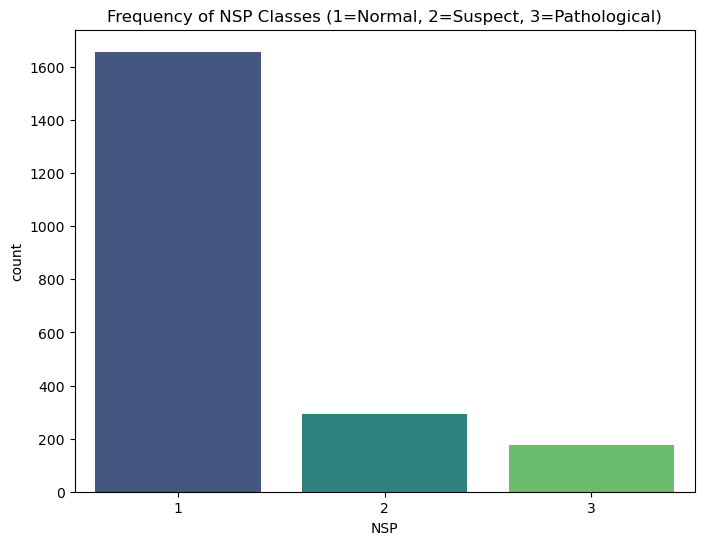

In [17]:
# 1. Bar chart for NSP Frequency
plt.figure(figsize=(8, 6))
sns.countplot(x='NSP', data=df, palette='viridis')
plt.title('Frequency of NSP Classes (1=Normal, 2=Suspect, 3=Pathological)')
plt.show();

In [18]:
### Histograms for key numerical features (LB, ASTV, MSTV, AC)

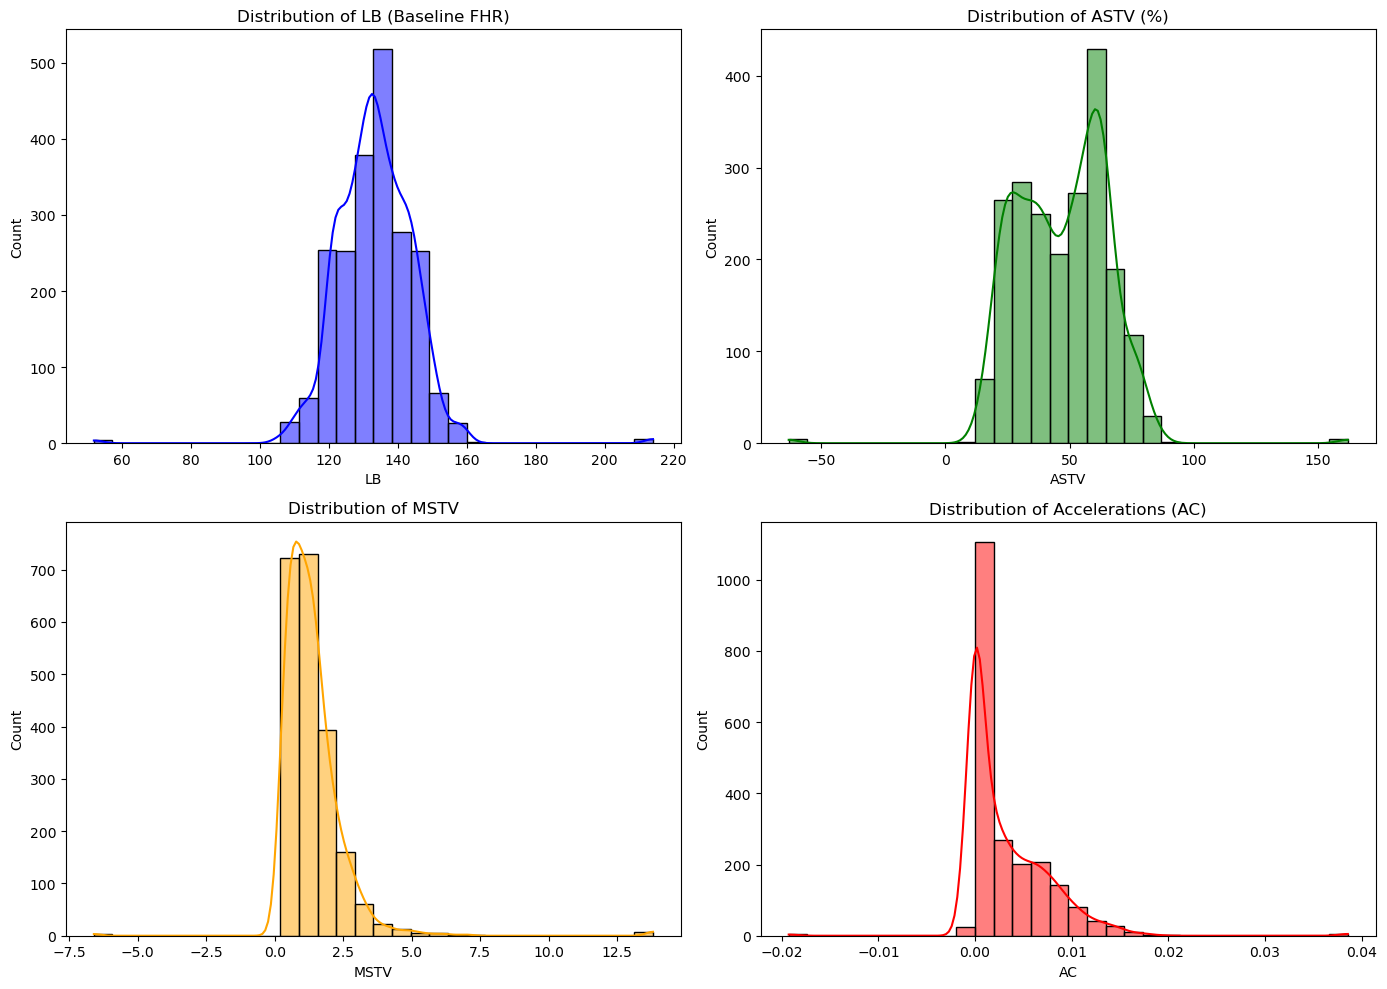

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(df['LB'], bins=30, kde=True, ax=axes[0, 0], color='blue').set_title('Distribution of LB (Baseline FHR)')
sns.histplot(df['ASTV'], bins=30, kde=True, ax=axes[0, 1], color='green').set_title('Distribution of ASTV (%)')
sns.histplot(df['MSTV'], bins=30, kde=True, ax=axes[1, 0], color='orange').set_title('Distribution of MSTV')
sns.histplot(df['AC'], bins=30, kde=True, ax=axes[1, 1], color='red').set_title('Distribution of Accelerations (AC)')
plt.tight_layout()
plt.show()

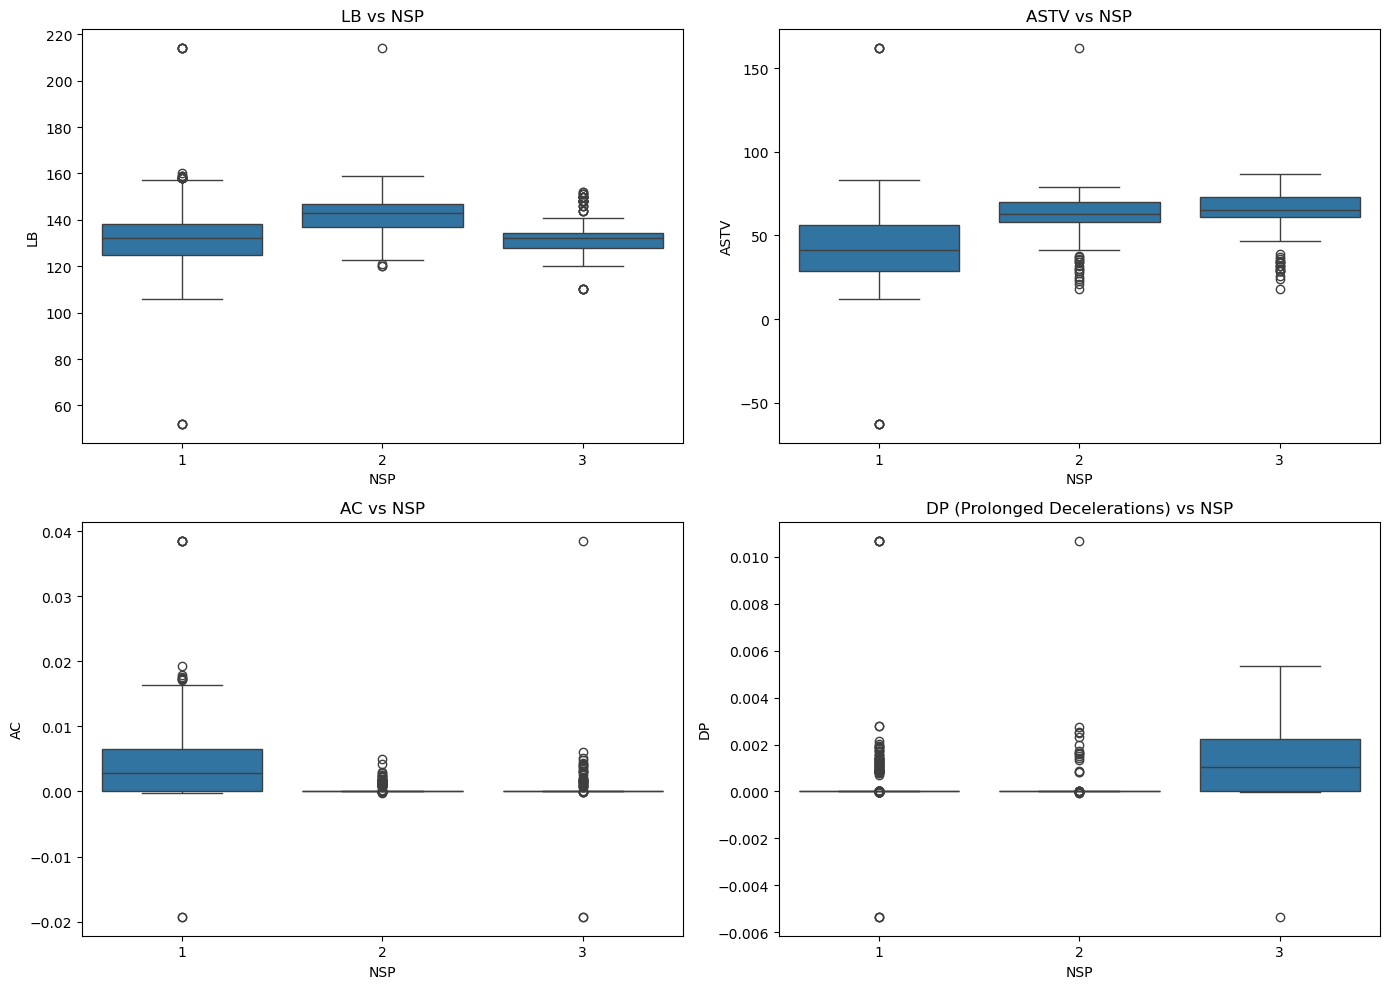

In [20]:
# 3. Boxplots to compare features across NSP classes
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.boxplot(x='NSP', y='LB', data=df, ax=axes[0, 0]).set_title('LB vs NSP')
sns.boxplot(x='NSP', y='ASTV', data=df, ax=axes[0, 1]).set_title('ASTV vs NSP')
sns.boxplot(x='NSP', y='AC', data=df, ax=axes[1, 0]).set_title('AC vs NSP')
sns.boxplot(x='NSP', y='DP', data=df, ax=axes[1, 1]).set_title('DP (Prolonged Decelerations) vs NSP')
plt.tight_layout()
plt.show()

In [21]:
### Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

In [22]:
corr = df.corr()

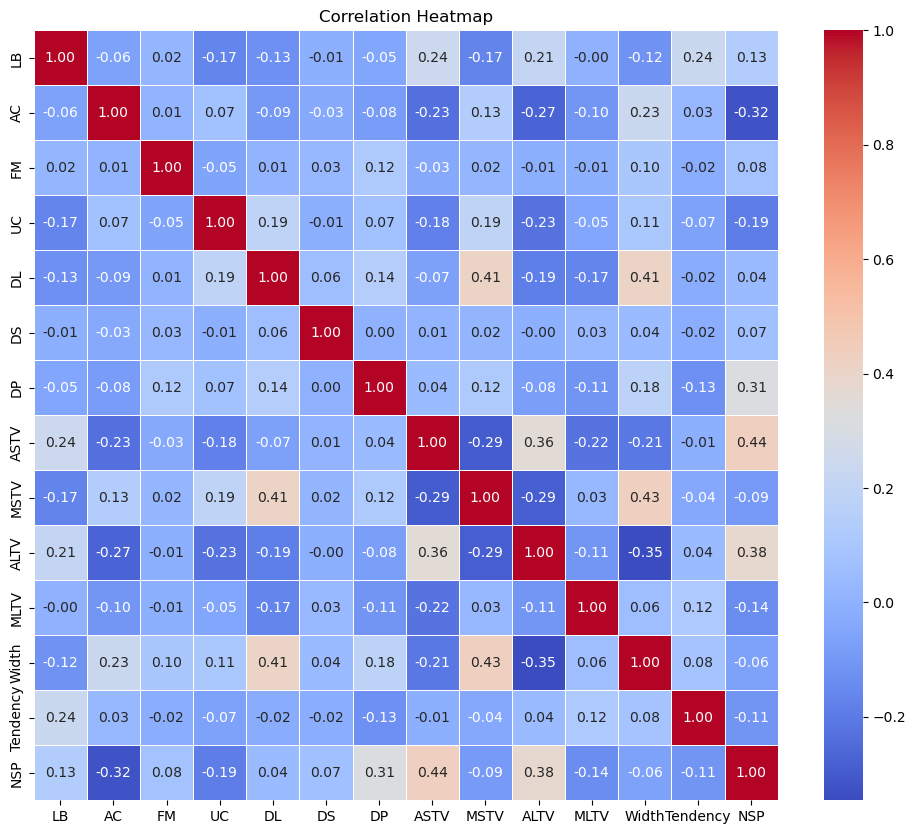

In [23]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

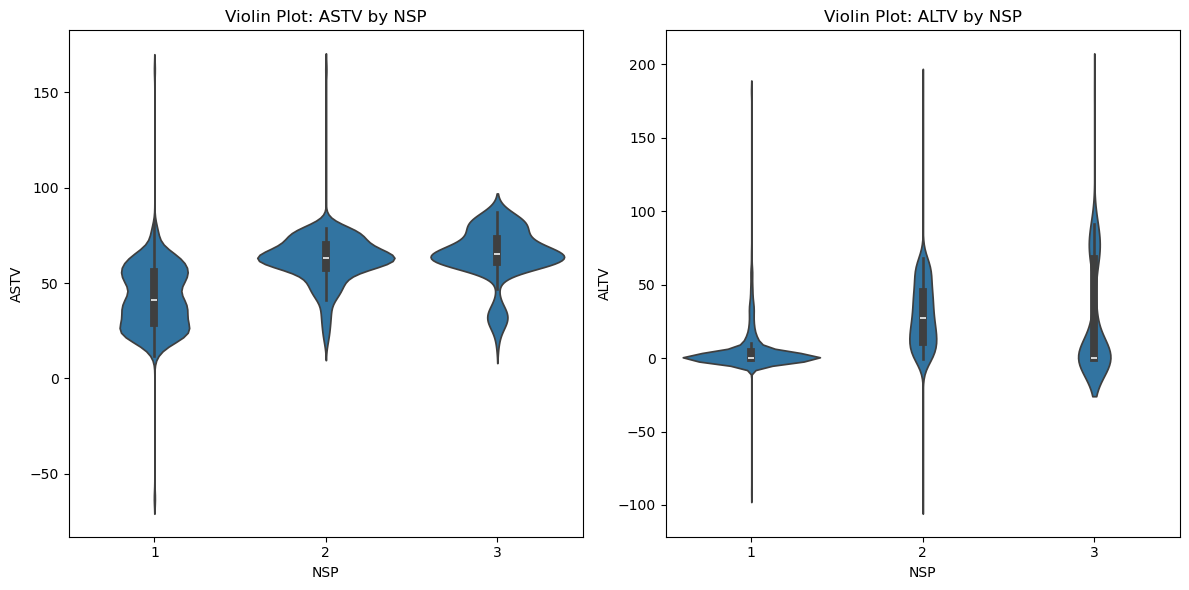

In [24]:
### Violin plots for ASTV and ALTV
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x='NSP', y='ASTV', data=df).set_title('Violin Plot: ASTV by NSP')
plt.subplot(1, 2, 2)
sns.violinplot(x='NSP', y='ALTV', data=df).set_title('Violin Plot: ALTV by NSP')
plt.tight_layout()
plt.show()

### Pattern Recognition and Insights

In [25]:
### According to the correlation matrix NSP is correlated with the ASTV and ALTV

### the lower astv and lower altv patients are considered as being normal,but higher astv and higher altv patients are considered as being pathetical

In [26]:
### higher prolonged decelerations(PD) and having higher abnormal activity(ASTV) likely to be pathetical

### Conclusion

In [27]:
### Further analysis